In [1]:
import pandas as pd
import json
import requests
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import time
from generate_and_plot_baseline_metrics import *

In [2]:
# Get all the datasets from API except the ones from PLAZI, GEO-TAG and PANGEA
summary_metadata = get_metadata_from_API(None, ['7ce8aef0-9e92-11dc-8738-b8a03c50a862',
                                                'd5778510-eb28-11da-8629-b8a03c50a862',
                                                'ef69a030-3940-11dd-b168-b8a03c50a862'])

In [4]:
################ Split dataset per type ################
checklist_summary_metadata = summary_metadata[summary_metadata.type == "CHECKLIST"]
other_summary_metadata = summary_metadata[summary_metadata.type != "CHECKLIST"]

In [5]:
################ Get metadata for example dataset ################
example_datasets = example_datasets = pd.read_table("potentially_exemplary_datasets.txt", names=["uuid"])["uuid"].tolist()
summary_example_datasets = get_metadata_from_API(example_datasets)

In [6]:
################ Esthetic ################

score_names = {"score_TD" : "title and description", 
               "score_E" : "contact", 
               "score_G" : "geographic coverage", 
               "score_T" : "time coverage", 
               "score_M" : "methods"}

score_names_checklist = {"score_TD" : "title and description", 
                         "score_E" : "contact", 
                         "score_G" : "geographic coverage"}

scores = {0: '#ff8c5b', 1: '#f7e865', 2: '#8add7c'}

# Quality statistics

The example datasets are the following:
* [Asteroids, ophiuroids and holothurians from the South-Eastern Weddell Sea (Southern Ocean)](https://www.gbif.org/dataset/a6058a01-5880-41f5-9dbf-3eef8591f714)
* [Circumpolar dataset of sequenced specimens of Promachocrinus kerguelensis (Echinodermata, Crinoidea)](https://www.gbif.org/dataset/9dae1fa0-5800-4f18-8f4e-a87f05c73eb1)
* [Sightings of marine mammals carried out during oceanographic surveys in the Argentine continental shelf](https://www.gbif.org/dataset/79e731ed-fe9b-4d50-93f7-ab1f01636385)
* [Data from ILAM surveys conducted by ARCOS in Rusumo landscape for year 2016](https://www.gbif.org/dataset/5d17a4fd-7249-46c0-a56b-1924d477b29e)
* [Djamde Wildlife Reserve in Togo: diversity of woody species](https://www.gbif.org/dataset/966b3e29-f1e4-4190-badd-100bc989788f)
* [Monitoring data of marine turtles on the Togolese coast over 2012-2013 years](https://www.gbif.org/dataset/11c00ed9-1c1b-47d1-9eb4-66a491c7d7b3)
* [Bird tracking - GPS tracking of Lesser Black-backed Gulls and Herring Gulls breeding at the southern North Sea coast](https://www.gbif.org/dataset/83e20573-f7dd-4852-9159-21566e1e691e)

## Scoring system

### Title and description

* **Incomplete** : title or description missing

* **ok** : title and description present

* **good** : title has more than three words

### Contact

* **Incomplete** : no administrative contact

* **ok** : administrative contact

* **good** : administrative contact with email

### Geographic coverage

* **Incomplete** : no geographic coverage

* **ok** : bounding box or description

* **good** : bounding box and description

### Time coverage

* **Incomplete** : no time coverage

* **ok** : one date

* **good** : at least two dates (range)

### Method

* **Incomplete** : no method section

* **ok** : some method

* **good** : one paragraph for each category: sampling, study extent, quality control, method step


## Overall quality for the datasets

### Non-checklists

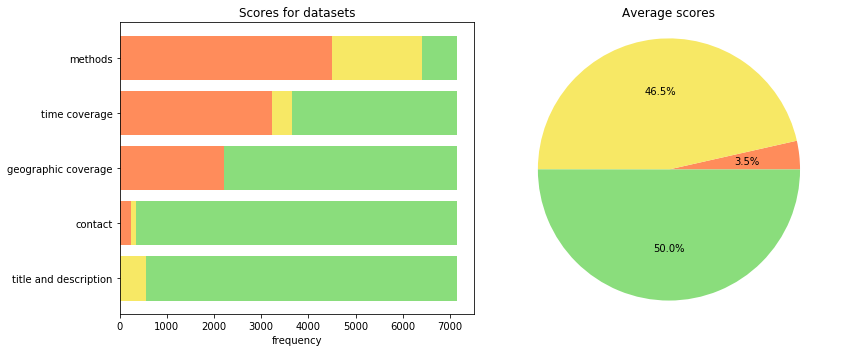

In [7]:
plot_general_scores(other_summary_metadata, score_names, scores)

### Checklist

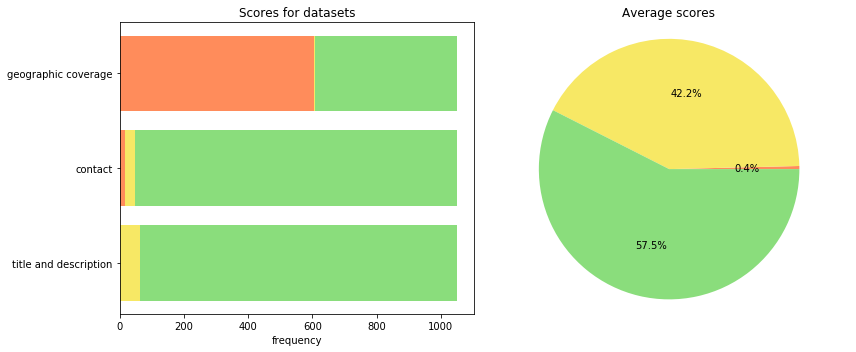

In [8]:
plot_general_scores(checklist_summary_metadata, score_names_checklist, scores)

## Quality each dataset (subsample of 500)

### Non-checklist

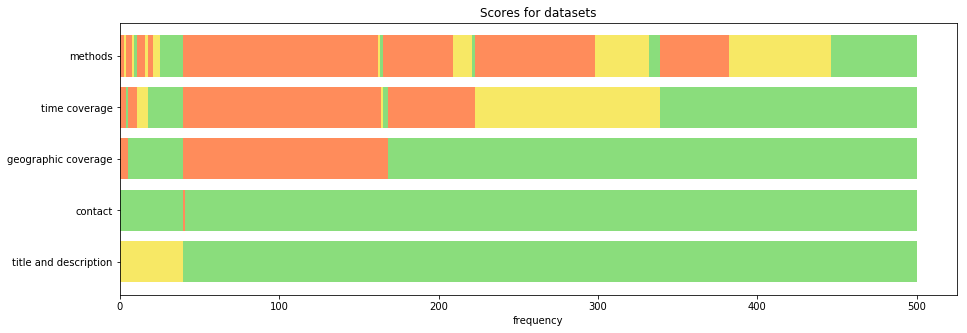

In [11]:
plot_each_dataset_score(other_summary_metadata[0:500], score_names, scores)

### Checklist

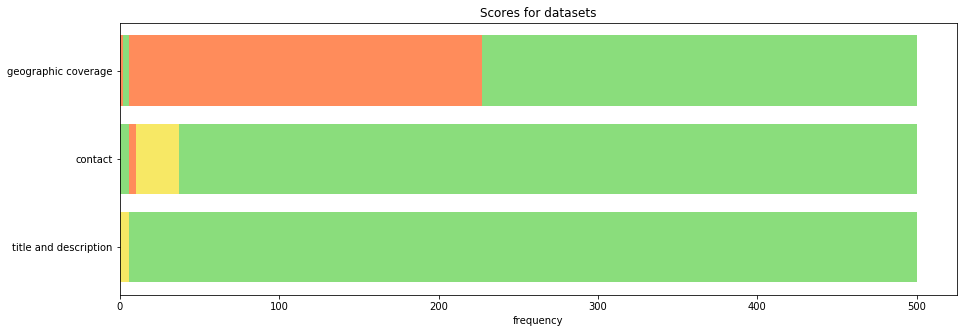

In [12]:
plot_each_dataset_score(checklist_summary_metadata[0:500], score_names_checklist, scores)

In [13]:
summary_metadata.to_csv("summary_baseline_metrics_metadata_PLAZI_GEOTAG_PANGEA_excluded.txt", sep = "\t")